# bevor ich's vergesse: Henning ich bekomme noch 10 Euro von dir

# overview
* basic python
* accessing data
* storing data in database
* manipulating dataframes
* visualizing data
* split-apply-combine
* heatmaps
* simple multilable classifier

## basic python

In [13]:
# import some libraries
import pandas as pd # dataframes
import seaborn as sns # visualization
%pylab inline # jupyter magic for embedding graphics

UsageError: unrecognized arguments: # jupyter magic for embedding graphics


In [2]:
# explain variables and dynamic types in python
a=1
print(a)
a="eins"
print(a)

1
eins


In [3]:
# explain list / set
mylist = [1,1,2,2,3,4,5,'sechs','sieben',0x08]
print(mylist)
myset = set(mylist)
print(myset)

[1, 1, 2, 2, 3, 4, 5, 'sechs', 'sieben', 8]
{1, 2, 3, 4, 5, 8, 'sechs', 'sieben'}


In [4]:
# explain dictionary
mydict = dict()
mydict['Andreas Steffen']=1
mydict['Djork-Arne']=5
print(mydict)
mydict = {'Andreas Steffen': 1, 'Djork-Arne': 5}
print(mydict)

{'Andreas Steffen': 1, 'Djork-Arne': 5}
{'Andreas Steffen': 1, 'Djork-Arne': 5}


In [5]:
# show a for loop
for ele in mylist:
    print(ele)

1
1
2
2
3
4
5
sechs
sieben
8


In [6]:
# show list comprehension
[ele for ele in mylist if isinstance(ele, int)]

[1, 1, 2, 2, 3, 4, 5, 8]

In [7]:
# import the random lib
import random

In [8]:
# a simple function
def random_int(max_int):
    ret_val = random.randint(0, max_int)
    return ret_val

In [9]:
random_int(99)

94

In [11]:
# explain dataframes
df = pd.DataFrame([random_int(100) for _ in range(10)])
print(df)
df = pd.DataFrame(columns = ['col1','col2'], data = [[1,'eins'],[2,'zwei']])
print(df)

    0
0  53
1  17
2  75
3  74
4  23
5  96
6  59
7  58
8   7
9  75
   col1  col2
0     1  eins
1     2  zwei


In [12]:
print(df.dtypes)
df.describe()

col1     int64
col2    object
dtype: object


,col1
count,2.000000
mean,1.500000
std,0.707107
min,1.000000
25%,1.250000
50%,1.500000
75%,1.750000
max,2.000000


# enough basics, let's do some data science

In [33]:
# read in the data movie_genres. it's in the data folder
data = pd.read_table('../data/movies_genres.tsv')

In [34]:
# let's inspect
data.head()

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}","With just one week left in the workshops, the...",0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",All of the women start making strides towards...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",All five of these women are independent and s...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",Despite having gone through a life changing p...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
# write data into a sqlite db
import sqlite3 as lite
con = lite.connect('../data/movies.db')
data.to_sql('movies',if_exists = 'replace', index = None, con = con)

In [18]:
# and read it back
data1 = pd.read_sql('SELECT * FROM movies', con)

In [19]:
data1.head()

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}","With just one week left in the workshops, the...",0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",All of the women start making strides towards...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",All five of these women are independent and s...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",Despite having gone through a life changing p...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
# show indexing
data.loc[[1,2],:]

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}","With just one week left in the workshops, the...",0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",All of the women start making strides towards...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
# only selected columns
data[['title','plot']]

,title,plot
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}","With just one week left in the workshops, the..."
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",All of the women start making strides towards...
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",All five of these women are independent and s...
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",Despite having gone through a life changing p...
5,"""#Cake"" (2015)",#CAKE is a hour-long serial narrative comedy ...
6,"""#CandidlyNicole"" (2013) {What's My Sports Vib...","When you're married to a sports nut, sometime..."
7,"""#Elmira"" (2014)",#Elmira follows the story of a bunch of stran...
8,"""#Hashtag: The Series"" (2013)",Friend Me. Follow Me. Like Me. Fall for Me. #...
9,"""#LawstinWoods"" (2013)",#LawstinWoods follows the story of 6 stranger...


In [35]:
# let's extract the year
data['year'] = data.title.str.extract('\((\d{4})', expand = True)[0]
#data['year'] = data.title.str.extract('\((\d{4})(/[IVXD]{1,3})?\)', expand = True)[0]

In [42]:
data.year.unique()

array(['2013', '2015', '2014', '2016', '2010', '1984', '2004', '2003',
       '1979', '1982', '2007', '2006', '1961', '2009', '2012', '2002',
       '1989', '1999', '2008', '1992', '2011', '2005', '2017', '1964',
       '1959', nan, '1991', '2000', '1967', '1986', '1977', '1993', '1997',
       '1978', '1995', '1987', '1985', '2001', '1957', '1976', '1996',
       '1988', '1998', '1994', '1968', '1973', '1958', '1965', '1981',
       '1971', '1970', '1990', '1966', '1980', '2018', '1969', '1972',
       '1953', '1960', '1963', '1950', '1949', '1962', '1983', '1948',
       '1956', '1952', '1951', '1974', '1955', '1975', '1954', '1930',
       '2019', '1946', '2021', '1940', '1947', '1944', '1934', '1938',
       '2022', '1933', '1936', '1942', '1937'], dtype=object)

In [37]:
# find NA years
data[pd.isnull(data.year)]

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,year
276,"""13 Going on 13"" (????) {(#1.2)}",A class project splits the students into grou...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
277,"""13 Going on 13"" (????) {(#1.4)}",Larry Finkelstein contracts a rare strain of ...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
278,"""13 Going on 13"" (????) {(#1.6)}",Leslie and her classmates wake up after a wil...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
863,"""4 Seasons"" (????)",The premise of the show is six friends who ha...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2042,"""A Little Rees Specht Cultivates Kindness"" (????)",A Little Rees Specht Cultivates Kindness foll...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3098,"""After Hours: A Web Series"" (????)",Heart-wrenching chaos at home causes Kenneth'...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,NaN
4815,"""American Coyote"" (????)",Samuel desperate to have his family to join h...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
7082,"""Astoria"" (????/II) {Pilot (#1.1)}","11 year old Zack Turner is sent to Astoria, O...",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
7848,"""Avrupa"" (????)","AVRUPA, after the Turkish word for Europe, ce...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
8531,"""Ballin' with the Stars"" (????)",Fast paced entertainment extravaganza with mo...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,NaN


In [43]:
# drop the ones without a year
data = data.dropna(subset = ['year'])

In [44]:
# drop duplicates by year and plot
data = data.drop_duplicates(['year', 'plot'])

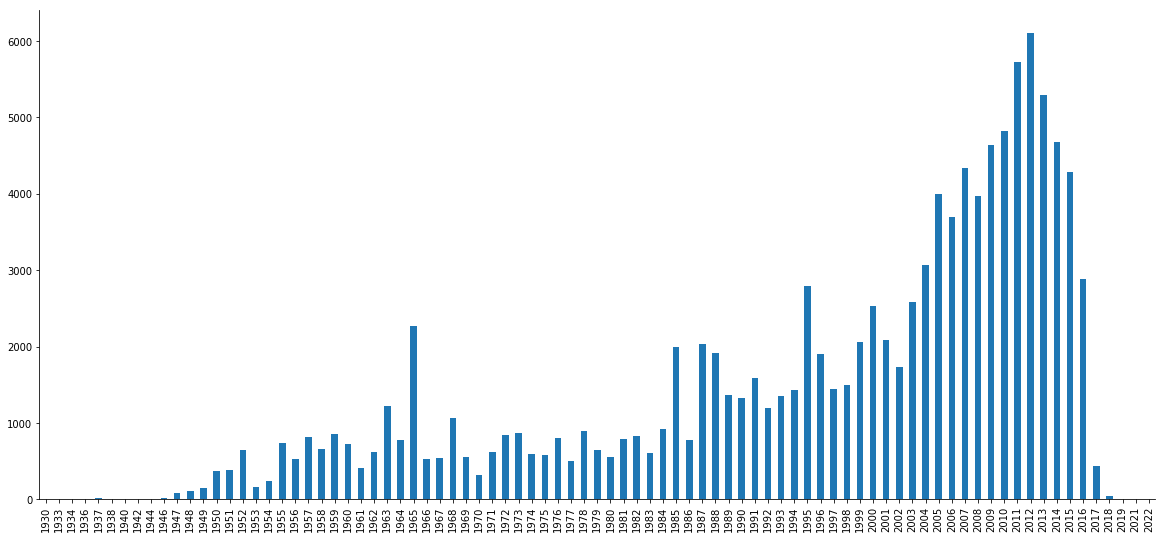

In [45]:
# plot by year
plt.figure(figsize = (20,9))
data.year.value_counts().sort_index().plot.bar()
sns.despine()

In [47]:
!pip install langdetect --user

In [48]:
# only english
from langdetect import detect

ModuleNotFoundError: No module named 'langdetect'

In [49]:
print(detect("My name is Andreas Steffen"))

NameError: name 'detect' is not defined

In [50]:
print(detect("Ich heisse Andreas Steffen"))

NameError: name 'detect' is not defined

In [51]:
# show for top 100

In [52]:
# do for all takes to long
#data['language'] = [detect(plot) for plot in data['plot'].tolist()]

In [53]:
# read in language 
#data.to_csv('../data/movies_genres.with_year_lang.tsv', sep = '\t')
data = pd.read_table('../data/movies_genres.with_year_lang.tsv', sep = '\t',index_col = 0)

In [54]:
# show stats
data.language.value_counts()

en    116269
nl       120
de        14
it         6
da         5
es         2
no         2
fr         2
pt         2
hu         1
sl         1
sv         1
ca         1
Name: language, dtype: int64

In [55]:
# check some languages
data.query("language == 'fr'")['plot'].tolist()

[' Frankreich während des ersten Weltkrieges: Im Militärhospital Besancon hält sich Krankenschwester Véronique d\'Hergemont (Claude Jade) seit 14 Jahren vor ihrem verhaßten Ehemann Vorski versteckt. Die Nachricht von seinem Tod und das Auftauchen ihrer Initialen in einem Stummfilm führen Véronique auf eine geheimnisvolle Insel, die von Geistern und Druiden beherrscht scheint. Grausame Prophezeiungen von einem Massaker an dreißig Menschen erfüllen sich und Véronique stellt sich einem scheinbar aussichtslosen Kampf... Das phantastische Abenteuer, das erst 1996 seine deutsche Erstausstrahlung hatte, basiert auf dem Roman "Die Insel der dreißig Särge" von Maurice Leblanc. Deutscher Titel: "DIE INSEL DER DREISSIG TODE". L\'histoire se passe en 1917, en pleine guerre mondiale. Véronique (Claude Jade) est une jeune femme de 35 ans, infirmière à l\'hôpital militaire de Besançon. Elle apprend soudain l\'assassinat de son mari, le mystérieux Comte Vorski, qu\'elle n\'a pas vu depuis quatorze ans

In [56]:
data = data.query("language == 'en'")

In [57]:
# get genres
genres = data.filter(regex = "[A-Z]", axis = 1).columns.tolist()

In [58]:
genres

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Lifestyle',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

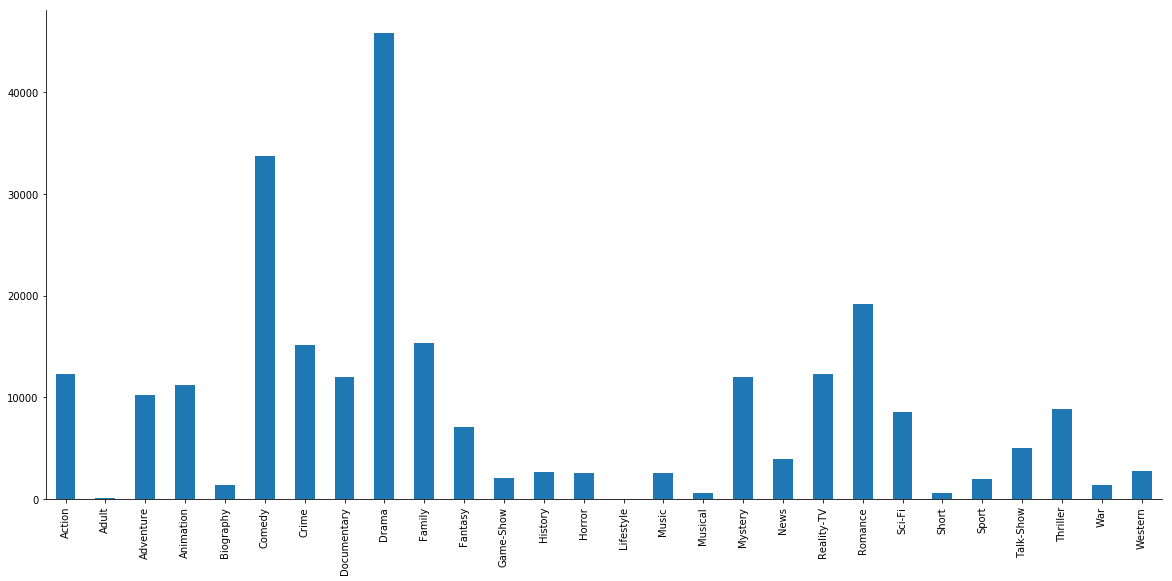

In [59]:
# plot genre occurence
plt.figure(figsize = (20,9))
data[genres].sum().plot.bar()
sns.despine()

In [60]:
# melt the data
data_melt = pd.melt(data,id_vars = ['title', 'plot'], value_vars = genres, var_name = 'genre')

In [61]:
# remove zeros
data_melt = data_melt[data_melt.value!=0]

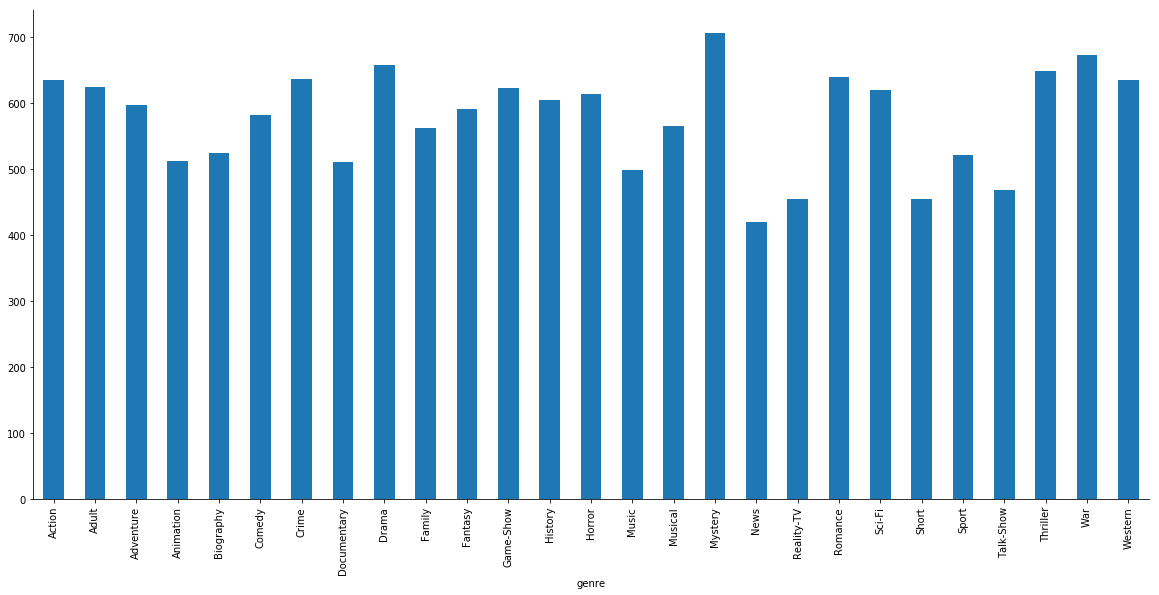

In [63]:
# calculate average number of chars in plot description per genre and plot
plt.figure(figsize = (20,9))
data_melt.groupby('genre').apply(lambda x: x['plot'].str.len().mean()).plot.bar()
sns.despine()

In [64]:
# calculate the plot string len
data_melt['plot_string_len'] = data_melt['plot'].str.len()

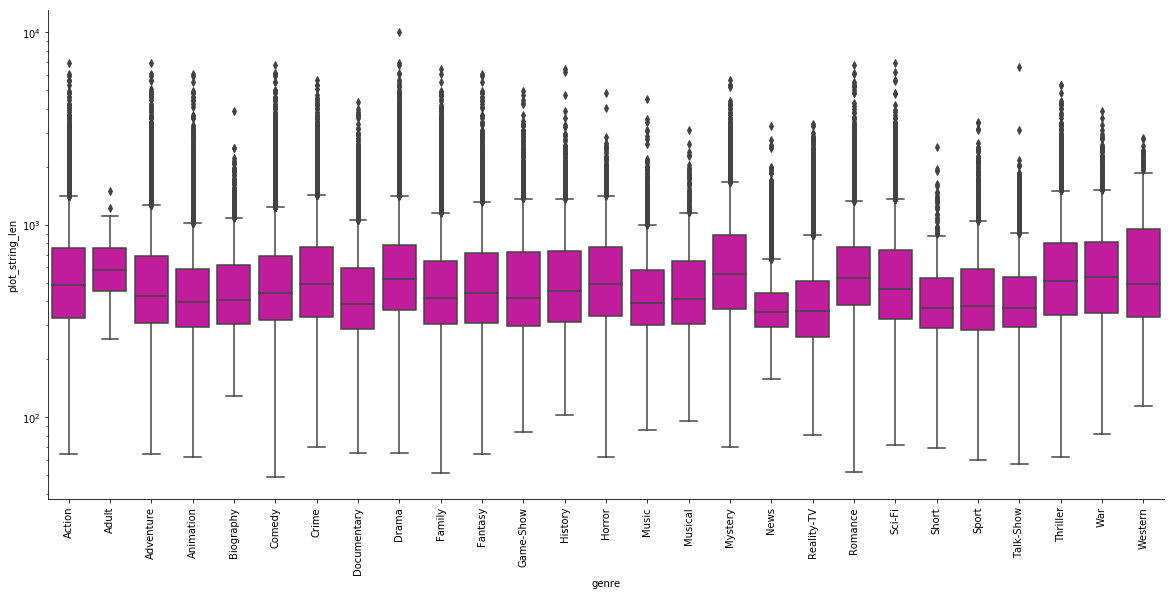

In [73]:
# but let's use a boxplot
plt.figure(figsize=(20,9))
g = sns.boxplot(data = data_melt, x= 'genre', y= 'plot_string_len', color = '#dd00aa')
g.set( yscale="log")
plt.xticks(rotation = 90)
sns.despine()

In [74]:
# inspect strongst outlier
data_melt.sort_values('plot_string_len', ascending = False).head(1)['plot'].values

array([ ' Maya Akutsu (Yuki Amami) began her class teacher career in 1998 April. The class (Primary 6) Maya taught was problematic. One student, Ai(12), told Maya that she love Maya, but Maya keep tell Ai that she love every students. Ai tried to cause things in class, until in science lesson, Ai put a burning match into the flask and made explosion, Maya knew that Ai has mental illness, she wants Maya to take total attention to herself. Ai decided to libel Maya for brutal torture, and next day Ai\'s mother found headmaster, and got Maya to stop teaching Ai\'s class. Then Ai made Maya to hit her, and called the discipline teacher, and Maya had to resign. Maya married her husband, got Sean. When Sean was 5, got mental illness. Maya and her husband always struggled about Sean, make Sean sad. Sean knew Maya loves butterfly, and Sean had been told not to go to a lake which was deep enough to kill him. Next day, news report on TV reported that Maya\'s husband\'s company has avoided heavy ta

In [75]:
# calculate similarity of genres
from scipy.spatial import distance as d

In [76]:
# filter the genre subset
data_genres = data.filter(regex = '[A-Z]', axis = 1)

In [84]:
data_genres.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


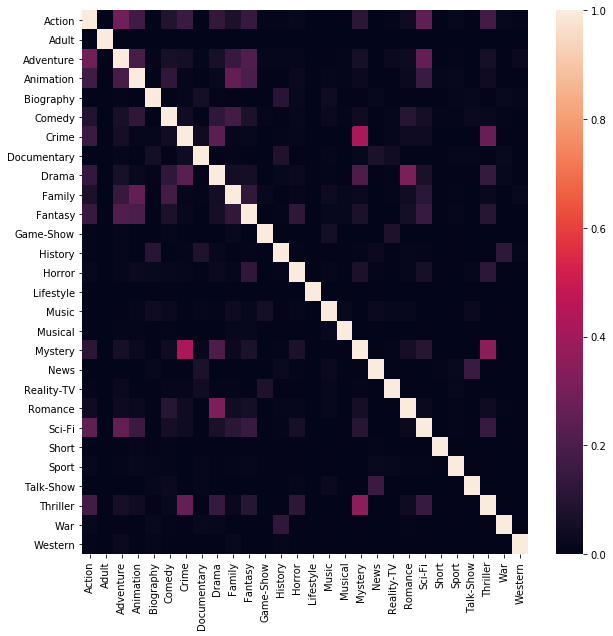

In [77]:
# plot the similarity heatmap
res = 1-d.squareform(d.pdist(data_genres.T, 'jaccard'))
plt.figure(figsize = (10,10))
sims = pd.DataFrame(res, index=data_genres.columns, columns= data_genres.columns)
sns.heatmap(sims)

# let's train a classifier

In [145]:
# import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [161]:
# first generate a feature representation of each abstract
tfidf = TfidfVectorizer()
classifier = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', OneVsRestClassifier(RandomForestClassifier()))])

In [162]:
train_x = data['plot'].head(10000)

In [163]:
train_y = data_genres.head(10000).as_matrix()

In [164]:
classifier.fit(train_x, train_y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 14 is present in all training examples.
  str(classes[c]))


Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ... oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          n_jobs=1))])

In [263]:
# let's fetch some movie descriptions from itunes
actor = 'Cate Blanchett'.replace(' ','+')
test = pd.read_json('https://itunes.apple.com/search?term={actor}&entity=movie&limit=200'.format(actor = actor))

In [264]:
test_extract = test.results.apply(lambda x: pd.Series({'plot': x['longDescription'],'title':x['trackName']}) )

In [265]:
test_extract

,plot,title
0,"In Marvel Studios’ Thor: Ragnarok, Thor is imp...",Thor: Ragnarok
1,"""One ring to rule them all. One ring to find t...",The Lord of the Rings: The Return of the King
2,"""One ring to rule them all. One ring to find t...",The Lord of the Rings: The Two Towers
3,In the midst of WWII a small group of art expe...,The Monuments Men
4,Academy Award®-winning filmmaker Peter Jackson...,The Hobbit: An Unexpected Journey
5,In the middle chapter of this historic movie t...,The Lord of the Rings: The Two Towers (Extende...
6,An action-packed suspense-thriller starring Ac...,Hanna
7,"""I was born under unusual circumstances."" And ...",The Curious Case of Benjamin Button
8,"""One ring to rule them all. One ring to find t...",The Lord of the Rings: The Fellowship of the Ring
9,With the help of a courageous fellowship of fr...,The Lord of the Rings: The Fellowship of the R...


In [268]:
predicted = classifier.predict_proba(test_extract['plot'])

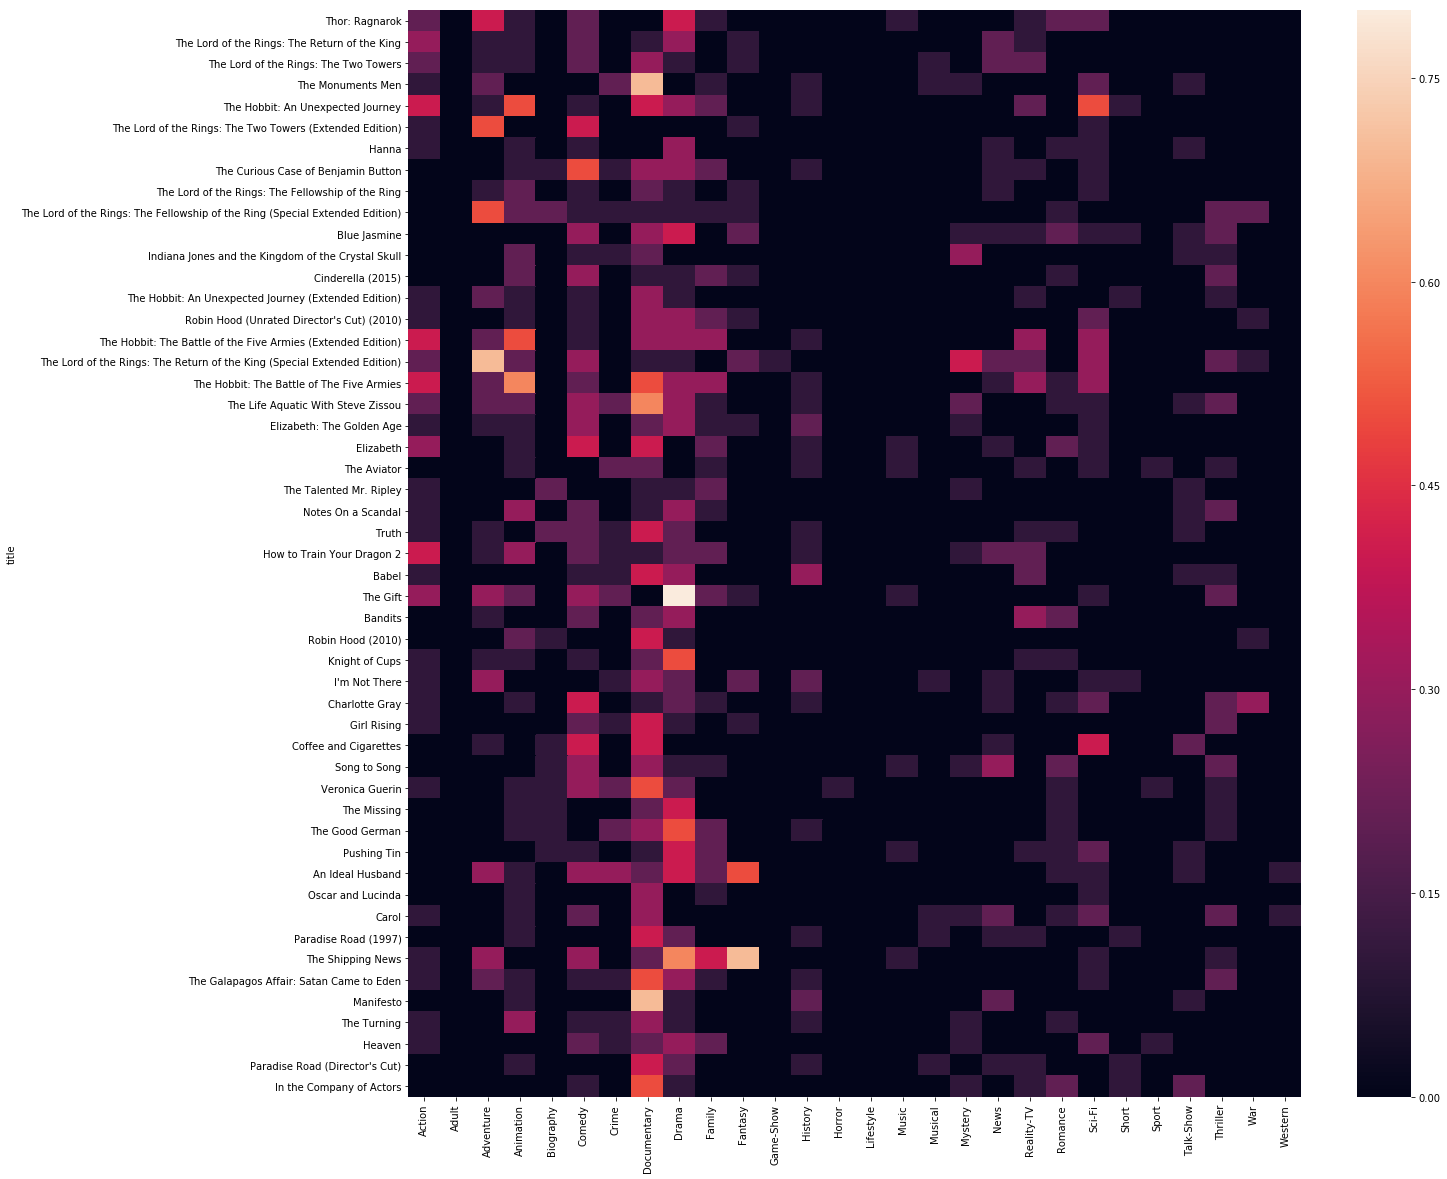

In [269]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.DataFrame(predicted, columns = data_genres.columns, index = test_extract.title))